In [106]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Data upload

In [107]:
df=pd.read_csv('train.csv')
df3=pd.read_csv('test.csv')

In [108]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [109]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Check quality of data

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [111]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [112]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
df3.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# data cleaning and fill the nan values in pandas

In [114]:
df['Item_Weight'].fillna(df.Item_Weight.mean(),inplace=True)

In [115]:
df3['Item_Weight'].fillna(df3.Item_Weight.mean(),inplace=True)

In [116]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [117]:
df3.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [118]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df.Outlet_Size.value_counts().index[0])

In [119]:
df3['Outlet_Size']=df3['Outlet_Size'].fillna(df3.Outlet_Size.value_counts().index[0])

In [120]:
df.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [121]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [122]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [123]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [124]:
df[df['Item_Type']=='Dairy'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Medium,Tier 3,Grocery Store,163.7868


In [125]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [126]:
df[df['Item_Visibility']==0].shape

(526, 12)

In [127]:
df3[df3['Item_Visibility']==0].shape

(353, 11)

In [128]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [129]:
df3.loc[:, 'Item_Visibility'].replace([0], [df3['Item_Visibility'].mean()], inplace=True)

In [130]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [131]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [132]:
df1=df[['Item_Type','Item_Weight','Item_MRP','Item_Visibility','Item_Fat_Content','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']]

In [133]:
df1

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,Dairy,9.300,249.8092,0.016047,Low Fat,1999,Medium,Tier 1,Supermarket Type1,FD
1,Soft Drinks,5.920,48.2692,0.019278,Regular,2009,Medium,Tier 3,Supermarket Type2,DR
2,Meat,17.500,141.6180,0.016760,Low Fat,1999,Medium,Tier 1,Supermarket Type1,FD
3,Fruits and Vegetables,19.200,182.0950,0.066132,Regular,1998,Medium,Tier 3,Grocery Store,FD
4,Household,8.930,53.8614,0.066132,Low Fat,1987,High,Tier 3,Supermarket Type1,NC
...,...,...,...,...,...,...,...,...,...,...
8518,Snack Foods,6.865,214.5218,0.056783,Low Fat,1987,High,Tier 3,Supermarket Type1,FD
8519,Baking Goods,8.380,108.1570,0.046982,Regular,2002,Medium,Tier 2,Supermarket Type1,FD
8520,Health and Hygiene,10.600,85.1224,0.035186,Low Fat,2004,Small,Tier 2,Supermarket Type1,NC
8521,Snack Foods,7.210,103.1332,0.145221,Regular,2009,Medium,Tier 3,Supermarket Type2,FD


# Feature engineering

In [134]:
df3['New_Item_Type'] = df3['Item_Identifier'].apply(lambda x: x[:2])
df3['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [135]:

df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [136]:

df3['New_Item_Type'] = df3['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df3['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [137]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food


In [138]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Dairy') ].shape

(73, 13)

In [139]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Dairy') ].head(73)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
293,FDH27,7.075,Low Fat,0.058585,Dairy,142.7128,OUT018,2009,Medium,Tier 3,Supermarket Type2,1869.5664,Food
368,FDL51,20.700,Regular,0.047685,Dairy,212.5876,OUT018,2009,Medium,Tier 3,Supermarket Type2,1286.3256,Food
412,FDZ38,17.600,Low Fat,0.008034,Dairy,174.2422,OUT018,2009,Medium,Tier 3,Supermarket Type2,4311.0550,Food
423,FDA27,20.350,Regular,0.066132,Dairy,256.7672,OUT018,2009,Medium,Tier 3,Supermarket Type2,5624.6784,Food
464,DRI51,17.250,Low Fat,0.042414,Dairy,173.1764,OUT018,2009,Medium,Tier 3,Supermarket Type2,4466.1864,Drinks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,FDT02,12.600,LF,0.024293,Dairy,33.4874,OUT018,2009,Medium,Tier 3,Supermarket Type2,105.8622,Food
8159,FDC15,18.100,Low Fat,0.178694,Dairy,158.9288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880,Food
8182,DRF27,8.930,Low Fat,0.028533,Dairy,151.4340,OUT018,2009,Medium,Tier 3,Supermarket Type2,1225.0720,Drinks
8280,FDB03,17.750,Regular,0.157471,Dairy,239.1538,OUT018,2009,Medium,Tier 3,Supermarket Type2,4326.3684,Food


In [140]:
365/73

5.0

In [141]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Soft Drinks') ].shape

(46, 13)

In [142]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Soft Drinks') ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
37,DRZ11,8.850,Regular,0.113124,Soft Drinks,122.5388,OUT018,2009,Medium,Tier 3,Supermarket Type2,1609.9044,Drinks
517,DRD37,9.800,Low Fat,0.013898,Soft Drinks,46.5060,OUT018,2009,Medium,Tier 3,Supermarket Type2,372.8480,Drinks
560,DRH13,8.575,Low Fat,0.023983,Soft Drinks,106.3280,OUT018,2009,Medium,Tier 3,Supermarket Type2,958.7520,Drinks
1103,DRF36,16.100,Low Fat,0.023673,Soft Drinks,189.0846,OUT018,2009,Medium,Tier 3,Supermarket Type2,5350.3688,Drinks


In [143]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Meat') ].shape

(46, 13)

In [144]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Meat') & (df['Item_Weight']== 13.850 ) ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
382,FDP51,13.85,Regular,0.085622,Meat,119.4124,OUT018,2009,Medium,Tier 3,Supermarket Type2,2251.7356,Food


In [145]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Fruits and Vegetables') ].shape

(135, 13)

In [146]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Household') ].shape

(95, 13)

In [147]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Baking Goods') ].shape

(68, 13)

In [148]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Snack Foods') ].shape

(132, 13)

In [149]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Frozen Foods') ].shape

(92, 13)

In [150]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Breakfast') ].shape

(12, 13)

In [151]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Health and Hygiene') ].shape

(58, 13)

In [152]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Hard Drinks') ].shape

(22, 13)

In [153]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Canned') ].shape

(78, 13)

In [154]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Breads') ].shape

(27, 13)

In [155]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Starchy Foods') ].shape

(17, 13)

In [156]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Others') ].shape

(20, 13)

In [157]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']=='Seafood') ].shape

(7, 13)

# Data Encoding

In [158]:
df.loc[df['Item_Type']=='Dairy', 'Item_Type'] = 0
df.loc[df['Item_Type']=='Soft Drinks', 'Item_Type'] =1
df.loc[df['Item_Type']=='Meat', 'Item_Type'] =2
df.loc[df['Item_Type']=='Fruits and Vegetables', 'Item_Type'] =3
df.loc[df['Item_Type']=='Household', 'Item_Type'] =4
df.loc[df['Item_Type']=='Baking Goods', 'Item_Type'] =5
df.loc[df['Item_Type']=='Snack Foods', 'Item_Type'] =6
df.loc[df['Item_Type']=='Frozen Foods', 'Item_Type'] =7
df.loc[df['Item_Type']=='Breakfast', 'Item_Type'] =8
df.loc[df['Item_Type']=='Health and Hygiene', 'Item_Type'] =9
df.loc[df['Item_Type']=='Hard Drinks', 'Item_Type'] =10
df.loc[df['Item_Type']=='Canned', 'Item_Type'] =11
df.loc[df['Item_Type']=='Breads', 'Item_Type'] =12
df.loc[df['Item_Type']=='Starchy Foods', 'Item_Type'] =13
df.loc[df['Item_Type']=='Others', 'Item_Type'] =14
df.loc[df['Item_Type']=='Seafood', 'Item_Type'] =15

In [159]:
df3.loc[df3['Item_Type']=='Dairy', 'Item_Type'] = 0
df3.loc[df3['Item_Type']=='Soft Drinks', 'Item_Type'] =1
df3.loc[df3['Item_Type']=='Meat', 'Item_Type'] =2
df3.loc[df3['Item_Type']=='Fruits and Vegetables', 'Item_Type'] =3
df3.loc[df3['Item_Type']=='Household', 'Item_Type'] =4
df3.loc[df3['Item_Type']=='Baking Goods', 'Item_Type'] =5
df3.loc[df3['Item_Type']=='Snack Foods', 'Item_Type'] =6
df3.loc[df3['Item_Type']=='Frozen Foods', 'Item_Type'] =7
df3.loc[df3['Item_Type']=='Breakfast', 'Item_Type'] =8
df3.loc[df3['Item_Type']=='Health and Hygiene', 'Item_Type'] =9
df3.loc[df3['Item_Type']=='Hard Drinks', 'Item_Type'] =10
df3.loc[df3['Item_Type']=='Canned', 'Item_Type'] =11
df3.loc[df3['Item_Type']=='Breads', 'Item_Type'] =12
df3.loc[df3['Item_Type']=='Starchy Foods', 'Item_Type'] =13
df3.loc[df3['Item_Type']=='Others', 'Item_Type'] =14
df3.loc[df3['Item_Type']=='Seafood', 'Item_Type'] =15

In [160]:
df.loc[df['Outlet_Size']=='Small', 'Outlet_Size'] = 0
df.loc[df['Outlet_Size']=='Medium', 'Outlet_Size'] =1
df.loc[df['Outlet_Size']=='High', 'Outlet_Size'] =2

In [161]:
df3.loc[df3['Outlet_Size']=='Small', 'Outlet_Size'] = 0
df3.loc[df3['Outlet_Size']=='Medium', 'Outlet_Size'] =1
df3.loc[df3['Outlet_Size']=='High', 'Outlet_Size'] =2

In [162]:
df.loc[df['Outlet_Location_Type']=='Tier 1', 'Outlet_Location_Type'] = 0
df.loc[df['Outlet_Location_Type']=='Tier 2', 'Outlet_Location_Type'] =1
df.loc[df['Outlet_Location_Type']=='Tier 3', 'Outlet_Location_Type'] =2

In [163]:
df3.loc[df3['Outlet_Location_Type']=='Tier 1', 'Outlet_Location_Type'] = 0
df3.loc[df3['Outlet_Location_Type']=='Tier 2', 'Outlet_Location_Type'] =1
df3.loc[df3['Outlet_Location_Type']=='Tier 3', 'Outlet_Location_Type'] =2

In [164]:
df.loc[df['Outlet_Type']=='Supermarket Type1', 'Outlet_Type'] = 0
df.loc[df['Outlet_Type']=='Supermarket Type2', 'Outlet_Type'] =1
df.loc[df['Outlet_Type']=='Supermarket Type3', 'Outlet_Type'] =2
df.loc[df['Outlet_Type']=='Grocery Store', 'Outlet_Type'] =3

In [165]:
df3.loc[df3['Outlet_Type']=='Supermarket Type1', 'Outlet_Type'] = 0
df3.loc[df3['Outlet_Type']=='Supermarket Type2', 'Outlet_Type'] =1
df3.loc[df3['Outlet_Type']=='Supermarket Type3', 'Outlet_Type'] =2
df3.loc[df3['Outlet_Type']=='Grocery Store', 'Outlet_Type'] =3

In [166]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [167]:
df[df['Item_Visibility']==0].shape

(0, 13)

In [168]:
df[df['Item_Visibility']==0].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type


In [169]:
df[df['Item_Visibility']>=0.0106].shape

(8286, 13)

In [170]:
df[df['Item_Visibility']>=0.1].shape

(1930, 13)

In [171]:
df[(df['Item_Type'] == 1) & (df['Outlet_Establishment_Year'] == 2007)].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
118,DRA12,11.60,Low Fat,0.041178,1,140.3154,OUT017,2007,1,1,0,2552.6772,Drinks
150,DRJ25,14.60,Low Fat,0.151419,1,50.3692,OUT017,2007,1,1,0,1034.6532,Drinks
158,DRD24,13.85,Low Fat,0.030969,1,140.9154,OUT017,2007,1,1,0,1701.7848,Drinks
165,DRL01,19.50,Regular,0.077609,1,233.4958,OUT017,2007,1,1,0,5375.0034,Drinks
283,DRE49,20.75,Low Fat,0.021370,1,153.0024,OUT017,2007,1,1,0,2277.0360,Drinks


In [172]:
df[(df['Outlet_Identifier'] == 'OUT017') & (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 1)].shape

(54, 13)

In [173]:
df[(df['Outlet_Identifier'] == 'OUT017') & (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 2)].shape

(44, 13)

In [174]:
df[(df['Outlet_Identifier'] == 'OUT018') & (df['Outlet_Establishment_Year'] == 2009) & (df['Item_Type'] == 1)].shape


(46, 13)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [176]:
df1=df[['Item_Type','Item_Weight','Item_MRP','Item_Visibility','Item_Fat_Content','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [177]:
df1

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,9.300,249.8092,0.016047,Low Fat,1999,1,0,0
1,1,5.920,48.2692,0.019278,Regular,2009,1,2,1
2,2,17.500,141.6180,0.016760,Low Fat,1999,1,0,0
3,3,19.200,182.0950,0.066132,Regular,1998,1,2,3
4,4,8.930,53.8614,0.066132,Low Fat,1987,2,2,0
...,...,...,...,...,...,...,...,...,...
8518,6,6.865,214.5218,0.056783,Low Fat,1987,2,2,0
8519,5,8.380,108.1570,0.046982,Regular,2002,1,1,0
8520,9,10.600,85.1224,0.035186,Low Fat,2004,0,1,0
8521,6,7.210,103.1332,0.145221,Regular,2009,1,2,1


In [178]:
df.loc[df['Item_Fat_Content']=='Low Fat', 'Item_Fat_Content'] = 1
df.loc[df['Item_Fat_Content']=='low fat', 'Item_Fat_Content'] = 1
df.loc[df['Item_Fat_Content']=='LF', 'Item_Fat_Content'] = 1
df.loc[df['Item_Fat_Content']=='Regular', 'Item_Fat_Content'] = 0
df.loc[df['Item_Fat_Content']=='reg', 'Item_Fat_Content'] = 0


In [179]:
df3.loc[df3['Item_Fat_Content']=='Low Fat', 'Item_Fat_Content'] = 1
df3.loc[df3['Item_Fat_Content']=='low fat', 'Item_Fat_Content'] = 1
df3.loc[df3['Item_Fat_Content']=='LF', 'Item_Fat_Content'] = 1
df3.loc[df3['Item_Fat_Content']=='Regular', 'Item_Fat_Content'] = 0
df3.loc[df3['Item_Fat_Content']=='reg', 'Item_Fat_Content'] = 0

In [180]:
df['Item_Fat_Content'] = pd.to_numeric(df['Item_Fat_Content'])
df['Item_Type'] = pd.to_numeric(df['Item_Type'])
df['Outlet_Size'] = pd.to_numeric(df['Outlet_Size'])
df['Outlet_Location_Type'] = pd.to_numeric(df['Outlet_Location_Type'])
df['Outlet_Type'] = pd.to_numeric(df['Outlet_Type'])

In [181]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,FDW58,20.750000,1,0.007565,6,107.8622,OUT049,1999,1,0,0,Food
1,FDW14,8.300000,0,0.038428,0,87.3198,OUT017,2007,1,1,0,Food
2,NCN55,14.600000,1,0.099575,14,241.7538,OUT010,1998,1,2,3,Non-Consumable
3,FDQ58,7.315000,1,0.015388,6,155.0340,OUT017,2007,1,1,0,Food
4,FDY38,12.695633,0,0.118599,0,234.2300,OUT027,1985,1,2,2,Food
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0,0.013496,6,141.3154,OUT046,1997,0,0,0,Food
5677,FDD47,7.600000,0,0.142991,13,169.1448,OUT018,2009,1,2,1,Food
5678,NCO17,10.000000,1,0.073529,9,118.7440,OUT045,2002,1,1,0,Non-Consumable
5679,FDJ26,15.300000,0,0.065684,11,214.6218,OUT017,2007,1,1,0,Food


In [182]:
df3['Item_Fat_Content'] = pd.to_numeric(df3['Item_Fat_Content'])
df3['Item_Type'] = pd.to_numeric(df3['Item_Type'])
df3['Outlet_Size'] = pd.to_numeric(df3['Outlet_Size'])
df3['Outlet_Location_Type'] = pd.to_numeric(df3['Outlet_Location_Type'])
df3['Outlet_Type'] = pd.to_numeric(df3['Outlet_Type'])

In [183]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.300,1,0.016047,0,249.8092,OUT049,1999,1,0,0,3735.1380,Food
1,DRC01,5.920,0,0.019278,1,48.2692,OUT018,2009,1,2,1,443.4228,Drinks
2,FDN15,17.500,1,0.016760,2,141.6180,OUT049,1999,1,0,0,2097.2700,Food
3,FDX07,19.200,0,0.066132,3,182.0950,OUT010,1998,1,2,3,732.3800,Food
4,NCD19,8.930,1,0.066132,4,53.8614,OUT013,1987,2,2,0,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,6,214.5218,OUT013,1987,2,2,0,2778.3834,Food
8519,FDS36,8.380,0,0.046982,5,108.1570,OUT045,2002,1,1,0,549.2850,Food
8520,NCJ29,10.600,1,0.035186,9,85.1224,OUT035,2004,0,1,0,1193.1136,Non-Consumable
8521,FDN46,7.210,0,0.145221,6,103.1332,OUT018,2009,1,2,1,1845.5976,Food


In [184]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Outlet_Identifier'] == 'OUT018' ) & (df['Item_Type']==1) ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
1,DRC01,5.920,0,0.019278,1,48.2692,OUT018,2009,1,2,1,443.4228,Drinks
37,DRZ11,8.850,0,0.113124,1,122.5388,OUT018,2009,1,2,1,1609.9044,Drinks
517,DRD37,9.800,1,0.013898,1,46.5060,OUT018,2009,1,2,1,372.8480,Drinks
560,DRH13,8.575,1,0.023983,1,106.3280,OUT018,2009,1,2,1,958.7520,Drinks
1103,DRF36,16.100,1,0.023673,1,189.0846,OUT018,2009,1,2,1,5350.3688,Drinks


In [185]:
df[ (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 1 ) ].shape

(54, 13)

In [186]:
df[ (df['Outlet_Establishment_Year'] == 2009) & (df['Item_Type'] == 5 ) ].shape

(68, 13)

In [187]:
df[ (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 2 ) ].shape

(44, 13)

In [188]:
df[ (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 3 ) ].shape

(127, 13)

In [189]:
df[ (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 4 ) ].shape

(95, 13)

In [190]:
df[ (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 5 ) ].shape

(73, 13)

In [191]:
df[ (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 6 ) ].shape

(128, 13)

In [192]:
df[ (df['Outlet_Establishment_Year'] == 2007) & (df['Item_Type'] == 5 ) ].shape

(73, 13)

In [193]:
df['New_Item_Type'].unique()

array(['Food', 'Drinks', 'Non-Consumable'], dtype=object)

In [194]:
df.loc[df['New_Item_Type']=='Food', 'New_Item_Type'] = 2
df.loc[df['New_Item_Type']=='Drinks', 'New_Item_Type'] = 1
df.loc[df['New_Item_Type']=='Non-Consumable', 'New_Item_Type'] = 0

In [195]:
df1=df[['Item_Type','Item_Weight','Item_MRP','Item_Visibility','Item_Fat_Content','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [196]:
tests=df3[['Item_Type','Item_Weight','Item_MRP','Item_Visibility','Item_Fat_Content','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Type                  8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Item_Visibility            8523 non-null   float64
 4   Item_Fat_Content           8523 non-null   int64  
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 599.4 KB


In [198]:
import seaborn as sns

# Normalization

C:\Users\user\AppData\Local\Temp\ipykernel_6780\2828837377.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Item_Outlet_Sales']))


-0.887753343209305

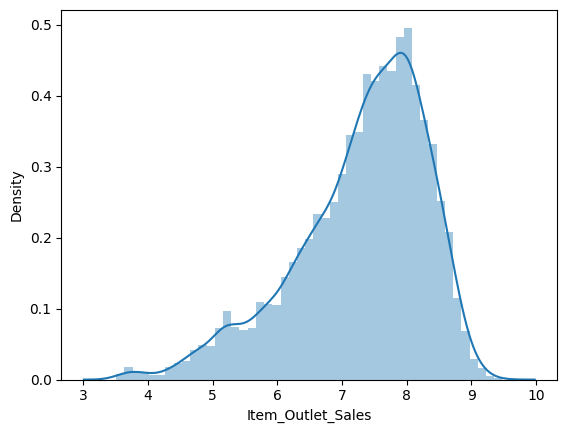

In [199]:
sns.distplot(np.log(df['Item_Outlet_Sales']))
np.log(df['Item_Outlet_Sales']).skew()

C:\Users\user\AppData\Local\Temp\ipykernel_6780\3985032736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.cbrt(df['Item_Outlet_Sales']))


-0.10250699736722735

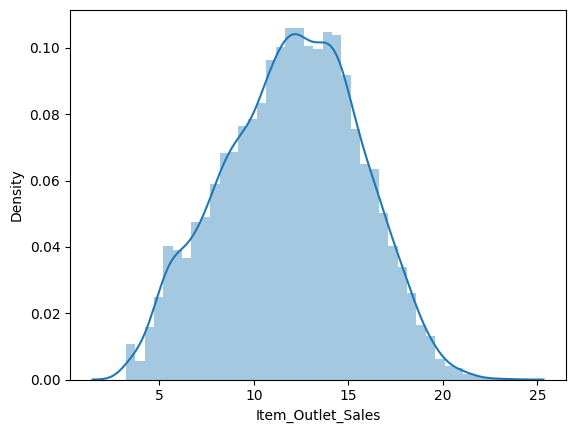

In [200]:
sns.distplot(np.cbrt(df['Item_Outlet_Sales']))
np.cbrt(df['Item_Outlet_Sales']).skew()

In [201]:
df2=np.cbrt(df['Item_Outlet_Sales'])

In [202]:
df1

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,9.300,249.8092,0.016047,1,1999,1,0,0
1,1,5.920,48.2692,0.019278,0,2009,1,2,1
2,2,17.500,141.6180,0.016760,1,1999,1,0,0
3,3,19.200,182.0950,0.066132,0,1998,1,2,3
4,4,8.930,53.8614,0.066132,1,1987,2,2,0
...,...,...,...,...,...,...,...,...,...
8518,6,6.865,214.5218,0.056783,1,1987,2,2,0
8519,5,8.380,108.1570,0.046982,0,2002,1,1,0
8520,9,10.600,85.1224,0.035186,1,2004,0,1,0
8521,6,7.210,103.1332,0.145221,0,2009,1,2,1


# Split train and test data 

In [203]:
x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2, random_state=0)

# Select the model

# Ridge regression

In [204]:
from sklearn.linear_model import Ridge

In [205]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [206]:
def cross_val(model_name,model,x,y,cv):
    
    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [207]:
from sklearn.linear_model import Ridge

#model
regressor_rd = Ridge()
#fit
regressor_rd.fit(x_train,y_train)

#predict
y_pred = regressor_rd.predict(x_test)

#score variables
RD_MAE = round(MAE(y_test, y_pred),2)
RD_MSE = round(MSE(y_test, y_pred),2)
RD_R_2 = round(R2(y_test, y_pred),4)
#RD_CS  = round(CVS(regressor_rd, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RD_MAE}\n")
print(f" Mean Squared Error: {RD_MSE}\n")
print(f" R^2 Score: {RD_R_2}\n")
#cross_val(regressor_rd,Ridge(normalize=True),x,y,5)

 Mean Absolute Error: 2.01

 Mean Squared Error: 6.38

 R^2 Score: 0.5178



In [208]:
print(regressor_rd.score(x_train,y_train))

0.5224485519346327


In [209]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [210]:
y_pred = ridge_regressor.predict(x_test)

#score variables
RD_MAE = round(MAE(y_test, y_pred),2)
RD_MSE = round(MSE(y_test, y_pred),2)
RD_R_2 = round(R2(y_test, y_pred),4)

In [211]:
print(f" Mean Absolute Error: {RD_MAE}\n")
print(f" Mean Squared Error: {RD_MSE}\n")
print(f" R^2 Score: {RD_R_2}\n")

 Mean Absolute Error: 2.01

 Mean Squared Error: 6.38

 R^2 Score: 0.5179



In [212]:
from sklearn.metrics import mean_squared_error

In [213]:
train_pred = ridge_regressor.predict(x_train)
mean_squared_error(y_train, train_pred)


6.0789988172931775

In [214]:

from sklearn.metrics import mean_squared_error

y_pred = ridge_regressor.predict(x_test)
mean_squared_error(y_test, y_pred)

6.375318317383009

In [215]:
train_pred = regressor_rd.predict(x_train)
mean_squared_error(y_train, train_pred)

6.079191381122396

In [216]:
y_pred = regressor_rd.predict(x_test)
mean_squared_error(y_test, y_pred)

6.3772154992920775

In [217]:
df1

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,9.300,249.8092,0.016047,1,1999,1,0,0
1,1,5.920,48.2692,0.019278,0,2009,1,2,1
2,2,17.500,141.6180,0.016760,1,1999,1,0,0
3,3,19.200,182.0950,0.066132,0,1998,1,2,3
4,4,8.930,53.8614,0.066132,1,1987,2,2,0
...,...,...,...,...,...,...,...,...,...
8518,6,6.865,214.5218,0.056783,1,1987,2,2,0
8519,5,8.380,108.1570,0.046982,0,2002,1,1,0
8520,9,10.600,85.1224,0.035186,1,2004,0,1,0
8521,6,7.210,103.1332,0.145221,0,2009,1,2,1


In [218]:
predictionss=ridge_regressor.predict([[1,5.920,48.2692,0.019278,0,2009,1,2,1]])
pred=format(float(predictionss[0]))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [219]:
pred

'8.882141717193718'

In [220]:
pred

'8.882141717193718'

In [221]:
df1

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,9.300,249.8092,0.016047,1,1999,1,0,0
1,1,5.920,48.2692,0.019278,0,2009,1,2,1
2,2,17.500,141.6180,0.016760,1,1999,1,0,0
3,3,19.200,182.0950,0.066132,0,1998,1,2,3
4,4,8.930,53.8614,0.066132,1,1987,2,2,0
...,...,...,...,...,...,...,...,...,...
8518,6,6.865,214.5218,0.056783,1,1987,2,2,0
8519,5,8.380,108.1570,0.046982,0,2002,1,1,0
8520,9,10.600,85.1224,0.035186,1,2004,0,1,0
8521,6,7.210,103.1332,0.145221,0,2009,1,2,1


In [222]:
df2

0       15.515611
1        7.625576
2       12.800240
3        9.013888
4        9.982319
          ...    
8518    14.058233
8519     8.189661
8520    10.606219
8521    12.266265
8522     9.148444
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [223]:
import pickle

pickle.dump(ridge_regressor,open('ridge.pkl','wb'))
Ridge = pickle.load(open('ridge.pkl','rb'))

In [224]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,FDW58,20.750000,1,0.007565,6,107.8622,OUT049,1999,1,0,0,Food
1,FDW14,8.300000,0,0.038428,0,87.3198,OUT017,2007,1,1,0,Food
2,NCN55,14.600000,1,0.099575,14,241.7538,OUT010,1998,1,2,3,Non-Consumable
3,FDQ58,7.315000,1,0.015388,6,155.0340,OUT017,2007,1,1,0,Food
4,FDY38,12.695633,0,0.118599,0,234.2300,OUT027,1985,1,2,2,Food
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0,0.013496,6,141.3154,OUT046,1997,0,0,0,Food
5677,FDD47,7.600000,0,0.142991,13,169.1448,OUT018,2009,1,2,1,Food
5678,NCO17,10.000000,1,0.073529,9,118.7440,OUT045,2002,1,1,0,Non-Consumable
5679,FDJ26,15.300000,0,0.065684,11,214.6218,OUT017,2007,1,1,0,Food


In [225]:
import pickle

pickle.dump(regressor_rd,open('ridges.pkl','wb'))
Ridge = pickle.load(open('ridges.pkl','rb'))

In [226]:
15.515611*15.515611*15.515611

3735.137964258879

In [227]:
8.830521717084736*8.830521717084736*8.830521717084736

688.5874273320452

In [228]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,FDW58,20.750000,1,0.007565,6,107.8622,OUT049,1999,1,0,0,Food
1,FDW14,8.300000,0,0.038428,0,87.3198,OUT017,2007,1,1,0,Food
2,NCN55,14.600000,1,0.099575,14,241.7538,OUT010,1998,1,2,3,Non-Consumable
3,FDQ58,7.315000,1,0.015388,6,155.0340,OUT017,2007,1,1,0,Food
4,FDY38,12.695633,0,0.118599,0,234.2300,OUT027,1985,1,2,2,Food
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0,0.013496,6,141.3154,OUT046,1997,0,0,0,Food
5677,FDD47,7.600000,0,0.142991,13,169.1448,OUT018,2009,1,2,1,Food
5678,NCO17,10.000000,1,0.073529,9,118.7440,OUT045,2002,1,1,0,Non-Consumable
5679,FDJ26,15.300000,0,0.065684,11,214.6218,OUT017,2007,1,1,0,Food


In [229]:
df4=df3[['Item_Type','Item_Weight','Item_MRP','Item_Visibility','Item_Fat_Content','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [230]:
df4

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,6,20.750000,107.8622,0.007565,1,1999,1,0,0
1,0,8.300000,87.3198,0.038428,0,2007,1,1,0
2,14,14.600000,241.7538,0.099575,1,1998,1,2,3
3,6,7.315000,155.0340,0.015388,1,2007,1,1,0
4,0,12.695633,234.2300,0.118599,0,1985,1,2,2
...,...,...,...,...,...,...,...,...,...
5676,6,10.500000,141.3154,0.013496,0,1997,0,0,0
5677,13,7.600000,169.1448,0.142991,0,2009,1,2,1
5678,9,10.000000,118.7440,0.073529,1,2002,1,1,0
5679,11,15.300000,214.6218,0.065684,0,2007,1,1,0


# RandomForestRegressor

In [231]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [232]:
print(regressor.score(x_train,y_train))

0.947635866203481


In [233]:
df1

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,9.300,249.8092,0.016047,1,1999,1,0,0
1,1,5.920,48.2692,0.019278,0,2009,1,2,1
2,2,17.500,141.6180,0.016760,1,1999,1,0,0
3,3,19.200,182.0950,0.066132,0,1998,1,2,3
4,4,8.930,53.8614,0.066132,1,1987,2,2,0
...,...,...,...,...,...,...,...,...,...
8518,6,6.865,214.5218,0.056783,1,1987,2,2,0
8519,5,8.380,108.1570,0.046982,0,2002,1,1,0
8520,9,10.600,85.1224,0.035186,1,2004,0,1,0
8521,6,7.210,103.1332,0.145221,0,2009,1,2,1


In [234]:
predictionss=regressor.predict([[0,9.300,249.8092,0.016047,1,1999,1,0,0]])
pred=format(float(predictionss[0]))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [235]:
pred

'16.05843189276134'

In [236]:
15.990046156904963*15.990046156904963*15.990046156904963

4088.360203308428

In [237]:


#score 
y_pred = regressor.predict(x_test)

#score variables
RD_MAE = round(MAE(y_test, y_pred),2)
RD_MSE = round(MSE(y_test, y_pred),2)
RD_R_2 = round(R2(y_test, y_pred),4)

# DecisionTreeRegressor

In [238]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [239]:
regr = DecisionTreeRegressor(max_depth=20)
regr.fit(df1, df2)

DecisionTreeRegressor(max_depth=20)

In [240]:
print(regr.score(x_train,y_train))

0.9569272732284247


In [241]:
df1

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,9.300,249.8092,0.016047,1,1999,1,0,0
1,1,5.920,48.2692,0.019278,0,2009,1,2,1
2,2,17.500,141.6180,0.016760,1,1999,1,0,0
3,3,19.200,182.0950,0.066132,0,1998,1,2,3
4,4,8.930,53.8614,0.066132,1,1987,2,2,0
...,...,...,...,...,...,...,...,...,...
8518,6,6.865,214.5218,0.056783,1,1987,2,2,0
8519,5,8.380,108.1570,0.046982,0,2002,1,1,0
8520,9,10.600,85.1224,0.035186,1,2004,0,1,0
8521,6,7.210,103.1332,0.145221,0,2009,1,2,1


In [242]:
df2

0       15.515611
1        7.625576
2       12.800240
3        9.013888
4        9.982319
          ...    
8518    14.058233
8519     8.189661
8520    10.606219
8521    12.266265
8522     9.148444
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [243]:
predictionss=regr.predict([[0,9.300,249.8092,0.016047,1,1999,1,0,0]])
pred=format(float(predictionss[0]))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [244]:
pred

'15.515611049489053'

In [245]:
15.515611049489053*15.515611049489053*15.5156110494890537

3735.1379999999995

In [246]:
import pickle

pickle.dump(regr,open('dtrs.pkl','wb'))
dtrs = pickle.load(open('dtrs.pkl','rb'))

In [247]:

y_pred = regr.predict(x_test)

#score variables
RD_MAE = round(MAE(y_test, y_pred),2)
RD_MSE = round(MSE(y_test, y_pred),2)
RD_R_2 = round(R2(y_test, y_pred),4)



In [248]:
print(f" Mean Absolute Error: {RD_MAE}\n")
print(f" Mean Squared Error: {RD_MSE}\n")
print(f" R^2 Score: {RD_R_2}\n")

 Mean Absolute Error: 0.3

 Mean Squared Error: 0.5

 R^2 Score: 0.9622



In [249]:

predictions = regr.predict(tests)


In [250]:
pd.Series(predictions)

0       12.154847
1       10.825429
2       10.153103
3       16.245879
4       19.902081
          ...    
5676    14.876589
5677    12.233728
5678     7.767933
5679    14.159687
5680    12.593748
Length: 5681, dtype: float64

In [251]:
tests

,Item_Type,Item_Weight,Item_MRP,Item_Visibility,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,6,20.750000,107.8622,0.007565,1,1999,1,0,0
1,0,8.300000,87.3198,0.038428,0,2007,1,1,0
2,14,14.600000,241.7538,0.099575,1,1998,1,2,3
3,6,7.315000,155.0340,0.015388,1,2007,1,1,0
4,0,12.695633,234.2300,0.118599,0,1985,1,2,2
...,...,...,...,...,...,...,...,...,...
5676,6,10.500000,141.3154,0.013496,0,1997,0,0,0
5677,13,7.600000,169.1448,0.142991,0,2009,1,2,1
5678,9,10.000000,118.7440,0.073529,1,2002,1,1,0
5679,11,15.300000,214.6218,0.065684,0,2007,1,1,0
